In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Iris.csv')

# 1) remove id column
# 2)check for null values
# 3) remove outliers
# 4)label encoding
# 5) assign x and y
# 6)create model and fit
# 7) predict

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [12]:
spec=df['Species']
spec=le.fit_transform(spec)

In [13]:
df['Species']=spec

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [16]:
df.drop('Id',axis=1,inplace=True)

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
x,y=df.drop('Species',axis='columns'),df['Species']

In [20]:
x.shape

(150, 4)

In [21]:
y.shape

(150,)

In [23]:
from sklearn.model_selection import train_test_split


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
model=GaussianNB()

In [33]:
model.fit(x_train,y_train)

GaussianNB()

In [34]:
y_pred=model.predict(x_test)

In [35]:
y_pred

array([2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [39]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9473684210526315

In [42]:
cm=confusion_matrix(y_test,y_pred)

In [43]:
cm

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  2, 14]], dtype=int64)

In [45]:
s=np.sum(cm)
s

38

In [47]:
rowsum=np.sum(cm,axis=0)# multiple rows sum
rowsum

array([14, 10, 14], dtype=int64)

In [48]:
colsum=np.sum(cm,axis=1)# multiple columns sums
colsum

array([14,  8, 16], dtype=int64)

<Axes: >

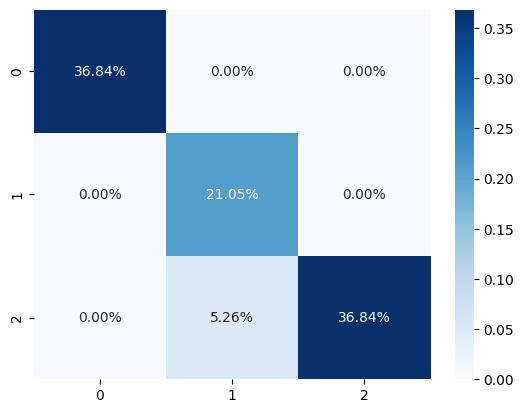

In [49]:
sns.heatmap(cm/s,annot=True,fmt='.2%',cmap='Blues')

In [54]:
def evaluate(cm,no):
    rs,cs=np.sum(cm,axis=0),np.sum(cm,axis=1)
    TP,FP,FN=cm[no][no],cs[no]-cm[no][no],rs[no]-cm[no][no]
    TN=np.sum(cm)-TP-FP-FN
    precision=TP/TP+FP
    recall=TP/TP+FN
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    return TP,FP,FN,TN,precision,recall,accuracy                              

In [55]:
TPs,FPs,FNs,TNs,ps,rs,accu_s=evaluate(cm,0)#setosa class 0

In [56]:
print('for class setosa')
print('TP :',TPs)
print('FP :',FPs)
print('FN :',FNs)
print('TN :',TNs)
print('Precision :',ps)
print('Recall :',rs)
print('Accuracy :',accu_s)

for class setosa
TP : 14
FP : 0
FN : 0
TN : 24
Precision : 1.0
Recall : 1.0
Accuracy : 1.0
